# Maximum Flow Algorithm implementation of Taha (2017)

## Library Importation

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import time

## User input and variable initialiation

In [3]:
num_nodes = int(input("Enter the number of nodes (e.g., 4): "))
num_edges = int(input("Enter the number of edges: "))

N = num_nodes + 1
C = [[0] * N for _ in range(N)]

print("Enter each edge in the format: a b w")
for _ in range(num_edges):
    a, b, w = map(int, input("Edge (a b w): ").split())
    C[a][b] = w

# Initialize residual capacities
R = [[C[i][j] for j in range(N)] for i in range(N)]

# Set source and sink
source = int(input("Enter the source node: "))
sink = int(input("Enter the sink node: "))

parent = [-1] * N
flow = [0] * N

Enter the number of nodes (e.g., 4):  4
Enter the number of edges:  5


Enter each edge in the format: a b w


Edge (a b w):  1 2 5
Edge (a b w):  1 3 4
Edge (a b w):  2 3 3
Edge (a b w):  2 4 5
Edge (a b w):  3 4 5
Enter the source node:  1
Enter the sink node:  4


## Graph visualization

In [4]:
def draw_graph(R, title, highlight_path=None, pause_time=1.5):
    G = nx.DiGraph()
    for i in range(1, N):
        for j in range(1, N):
            if C[i][j] > 0:
                flow_used = C[i][j] - R[i][j]
                G.add_edge(i, j, capacity=C[i][j], flow=flow_used)

    pos = nx.spring_layout(G, seed=42)
    edge_labels = {(u, v): f"{G[u][v]['flow']}/{G[u][v]['capacity']}" for u, v in G.edges()}

    plt.figure(figsize=(7, 5))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1200, arrowsize=20)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    if highlight_path:
        path_edges = list(zip(highlight_path[:-1], highlight_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="orange", width=3)

    plt.title(title)
    plt.axis("off")
    plt.show()
    time.sleep(pause_time)

## Algorithm Implmementation

In [5]:
def find_augmenting_path():
    global parent, flow
    parent = [-1] * N
    flow = [0] * N
    visited = [False] * N
    q = [source]
    visited[source] = True
    flow[source] = float('inf')

    while q:
        u = q.pop(0)
        for v in range(1, N):
            if not visited[v] and R[u][v] > 0:
                parent[v] = u
                flow[v] = min(flow[u], R[u][v])
                visited[v] = True
                q.append(v)
                if v == sink:
                    # Build path
                    path = []
                    cur = sink
                    while cur != -1:
                        path.append(cur)
                        cur = parent[cur]
                    path.reverse()
                    return path, flow[sink]
    return None, 0

def max_flow():
    total_flow = 0
    draw_graph(R, "Initial Residual Capacities", pause_time=2)

    path_id = 0
    while True:
        path, f = find_augmenting_path()
        if not path:
            break
        path_id += 1
        total_flow += f

        for i in range(len(path) - 1):
            u, v = path[i], path[i + 1]
            R[u][v] -= f
            R[v][u] += f

        draw_graph(R, f"After Path {path_id}: Flow = {total_flow}", highlight_path=path)

    return total_flow

## Main Function 

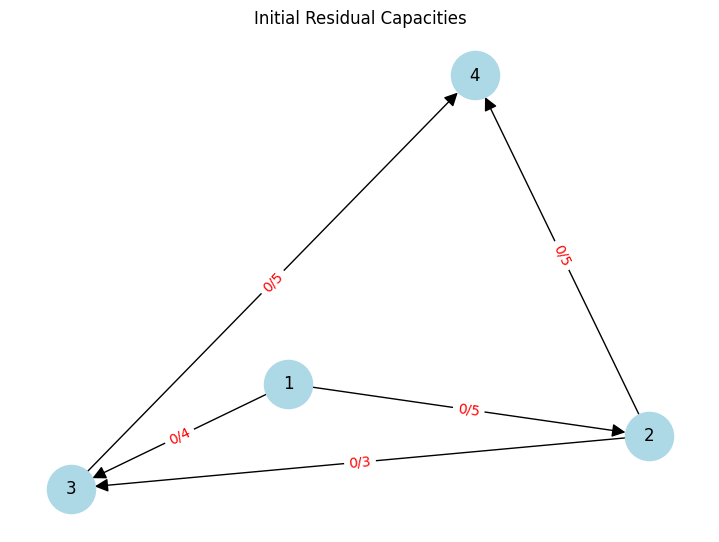

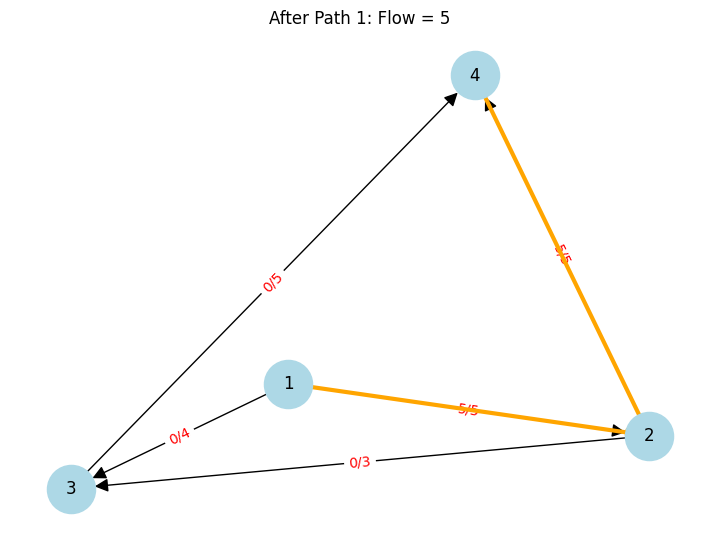

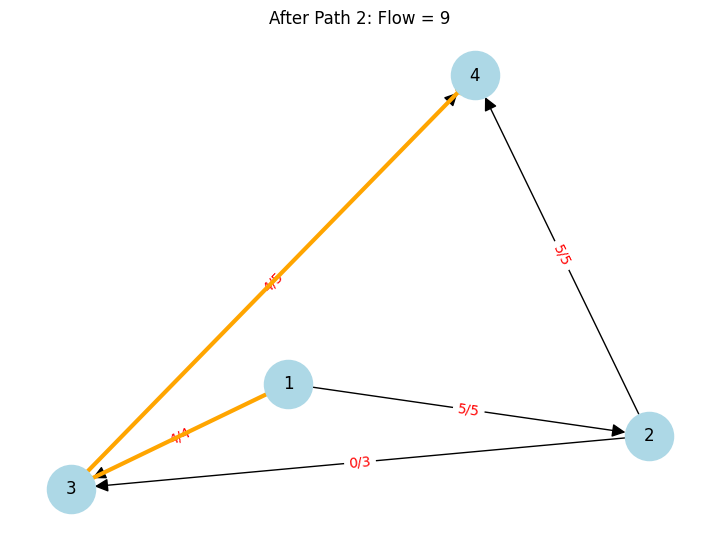

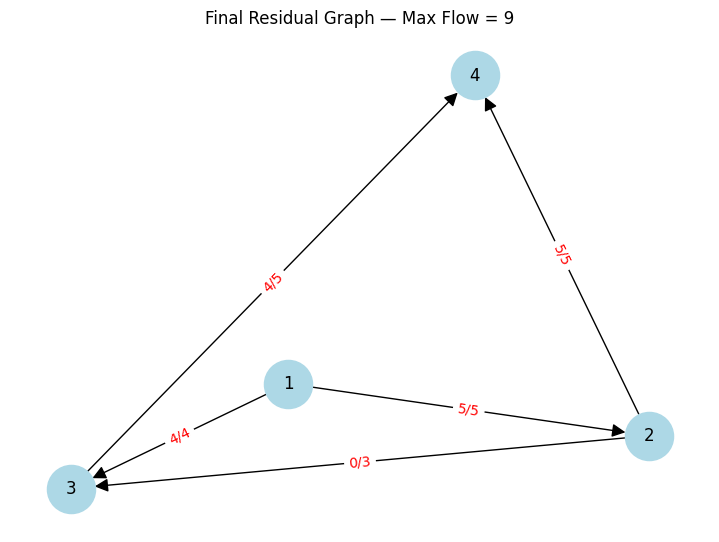

Maximum Flow: 9


In [6]:
max_flow_value = max_flow()
draw_graph(R, f"Final Residual Graph — Max Flow = {max_flow_value}", pause_time=0)

print("Maximum Flow:", max_flow_value)